In [1]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

np.random.seed(42)

In [2]:
df = pd.read_csv('./GSE150150_raw_counts.csv')

# Preprocessing Data
Will have 3 version to work with: `raw_counts`, `scaled_data`, `log_data`. Using log10 here, but any could work.

In [3]:
sampleDf = df

# X is shape of np.array([[1, 2], [2, 3], [1, 3], [10, 1], [9, 3], [11, 3]])
# Getting gene counts across all samples
X = sampleDf.iloc[:,1:].values
X = np.transpose(X)

In [12]:
from sklearn.preprocessing import StandardScaler

raw_counts = X
scaled_data = StandardScaler().fit_transform(raw_counts)

In [81]:
raw_counts.shape

(5376, 24582)

In [78]:
raw_counts[5375]

array([1098,  350,  122, ...,    0,    0,    0], dtype=int64)

In [79]:
test = np.log10(raw_counts[5375], where=raw_counts[5375] != 0)
test

array([3.04060234, 2.54406804, 2.08635983, ..., 0.        , 0.        ,
       0.        ])

In [87]:
log_data = []
for i in range(raw_counts.shape[0]):
    log_i = np.log10(raw_counts[i], where=raw_counts[i] != 0)
    log_data.append(log_i)

In [89]:
log_data[5375]

array([3.04060234, 2.54406804, 2.08635983, ..., 0.        , 0.        ,
       0.        ])

# t-SNE

In [96]:
tsne = TSNE(n_components=2, perplexity = 30, random_state=0, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X)

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [7]:
print(X_tsne.shape)

(5376, 2)


In [91]:
X_tsne_df = pd.DataFrame(X_tsne, columns = ['t-SNE-1', 't-SNE-2'])
X_tsne_df

,t-SNE-1,t-SNE-2
0,-5869.081055,11160.697266
1,-2688.902832,4442.295898
2,-5578.328125,10564.760742
3,-3094.091553,5349.318359
4,-6887.470703,13288.419922
...,...,...
5371,-2173.595703,3658.126709
5372,-11151.056641,21434.835938
5373,-1657.619141,2667.269287
5374,-2142.802734,3735.355957


# UMAP

# DBScan

code modified from: https://www.reneshbedre.com/blog/dbscan-python.html

In [92]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(X_tsne_df)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_tsne_df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

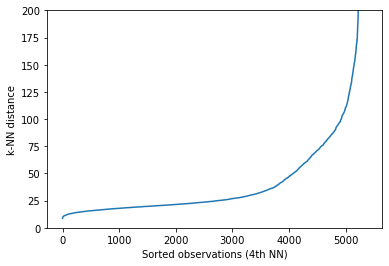

In [93]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.ylim([0, 200])
plt.show()

In [94]:
clusters = DBSCAN(eps = 35, min_samples = 4).fit(X_tsne_df)
# get cluster labels
set(clusters.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75}

In [95]:
from collections import Counter
Counter(clusters.labels_)

Counter({-1: 1336,
         19: 4,
         0: 5,
         5: 9,
         1: 6,
         2: 8,
         27: 5,
         3: 7,
         4: 8,
         14: 7,
         9: 9,
         6: 4,
         7: 4,
         8: 4,
         12: 4,
         10: 5,
         11: 5,
         13: 5,
         15: 4,
         16: 7,
         17: 4,
         18: 4,
         20: 3475,
         21: 10,
         25: 3,
         55: 12,
         22: 5,
         23: 10,
         49: 10,
         24: 26,
         26: 7,
         29: 15,
         28: 10,
         30: 11,
         31: 5,
         32: 5,
         33: 6,
         34: 11,
         54: 8,
         35: 4,
         36: 6,
         37: 10,
         52: 4,
         38: 11,
         39: 18,
         40: 10,
         41: 14,
         42: 12,
         43: 11,
         44: 4,
         45: 5,
         46: 5,
         57: 11,
         53: 4,
         59: 4,
         47: 8,
         48: 23,
         51: 7,
         50: 5,
         56: 29,
         58: 4,
         

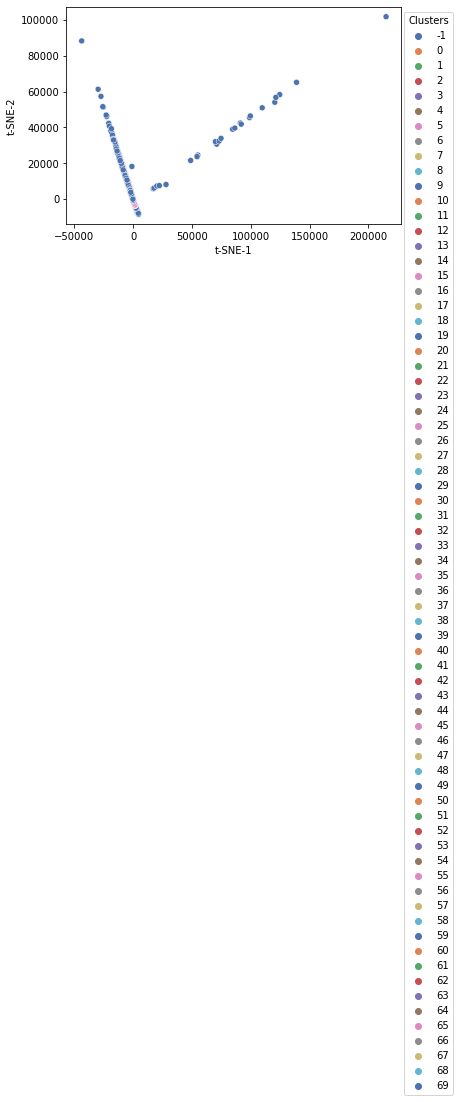

In [13]:
p = sns.scatterplot(data = X_tsne_df, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()